# FDA_hw3

## Data Preprocessing



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('hw3dataset/training.csv')
test = pd.read_csv('hw3dataset/test.csv')
train.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [3]:
train['Tomorrow Close Price'] = train['Close Price'].shift(-1)
test['Tomorrow Close Price'] = test['Close Price'].shift(-1)
train.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Tomorrow Close Price
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,927.45
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,934.70
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,906.65
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,909.73
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,890.35


In [4]:
def f(x):
    if x[1] > x[0]:
        return 1
    return 0

train['Tomorrow Increase'] = train[['Close Price', 'Tomorrow Close Price']].apply(f, axis=1)
test['Tomorrow Increase'] = test[['Close Price', 'Tomorrow Close Price']].apply(f, axis=1)
train.head(10)

,Date,Open Price,Close Price,High Price,Low Price,Volume,Tomorrow Close Price,Tomorrow Increase
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,927.45,0
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,934.70,1
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,906.65,0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,909.73,1
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,890.35,0
5,09-Jan-2009,909.91,890.35,911.93,888.31,4716499968,870.26,0
6,12-Jan-2009,890.40,870.26,890.40,864.32,4725049856,871.79,1
7,13-Jan-2009,869.79,871.79,877.02,862.02,5017469952,842.62,0
8,14-Jan-2009,867.28,842.62,867.28,836.93,5407880192,843.74,1
9,15-Jan-2009,841.99,843.74,851.59,817.04,7807350272,850.12,1


In [5]:
train = train.drop(['Date', 'Tomorrow Close Price'], axis=1)
test = test.drop(['Date', 'Tomorrow Close Price'], axis=1)
train.head()

,Open Price,Close Price,High Price,Low Price,Volume,Tomorrow Increase
0,902.99,931.80,934.73,899.35,4048270080,0
1,929.17,927.45,936.63,919.53,5413910016,1
2,931.17,934.70,943.85,927.28,5392620032,0
3,927.45,906.65,927.45,902.37,4704940032,1
4,905.73,909.73,910.00,896.81,4991549952,0


In [6]:
col = 'Tomorrow Increase'
x_train = train.loc[:, train.columns != col]
y_train = train[col]
x_test = test.loc[:, test.columns != col]
y_test = test[col]
x_train.head()

,Open Price,Close Price,High Price,Low Price,Volume
0,902.99,931.80,934.73,899.35,4048270080
1,929.17,927.45,936.63,919.53,5413910016
2,931.17,934.70,943.85,927.28,5392620032
3,927.45,906.65,927.45,902.37,4704940032
4,905.73,909.73,910.00,896.81,4991549952


In [7]:
x_train_std = x_train
x_train_std = (x_train_std - x_train_std.mean()) / x_train_std.std()
x_test_std = x_test
x_test_std = (x_test_std - x_test_std.mean()) / x_test_std.std()
x_train_std.head()

,Open Price,Close Price,High Price,Low Price,Volume
0,-1.551957,-1.494082,-1.505124,-1.540593,0.813446
1,-1.498010,-1.503047,-1.501205,-1.499034,1.823778
2,-1.493889,-1.488105,-1.486312,-1.483074,1.808027
3,-1.501555,-1.545913,-1.520140,-1.534374,1.299265
4,-1.546311,-1.539566,-1.556133,-1.545824,1.511306


## Logistic Regression

In [8]:
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import LogisticRegression

In [9]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)
    print(test_preds)

### Model 1

Use `sklearn.linear_model.SGDClassifier`

In [10]:
model_bl = linear_model.SGDClassifier(loss='log', max_iter=10000, tol=1e-3,
                                      learning_rate='adaptive', eta0=0.87)
model_bl.fit(x_train_std, y_train)
evaluate(model_bl, x_train_std, y_train, x_test_std, y_test)

Train accuracy: 0.5472614840989399
Test accuracy: 0.44841269841269843
[1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0
 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1]


If I drop some attributes...

In [11]:
x2_train_std = x_train_std.drop(['Close Price', 'Low Price', 'Open Price'], axis=1)
x2_test_std = x_test_std.drop(['Close Price', 'Low Price', 'Open Price'], axis=1)
x2_train_std.head()

,High Price,Volume
0,-1.505124,0.813446
1,-1.501205,1.823778
2,-1.486312,1.808027
3,-1.520140,1.299265
4,-1.556133,1.511306


In [12]:
model_bl.fit(x2_train_std, y_train)
evaluate(model_bl, x2_train_std, y_train, x2_test_std, y_test)

Train accuracy: 0.5459363957597173
Test accuracy: 0.5198412698412699
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
# plt.scatter(x2_train_std['Close Price'], x2_train_std['High Price'], x2_train_std['Volume'])

In [14]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='rectilinear')
# ax.scatter(x2_train_std['Close Price'], x2_train_std['High Price'], x2_train_std['Volume'])

In [15]:
two_attr_y = pd.concat([x2_test_std, y_test], axis=1, sort=False)
two_attr_y.head()

,High Price,Volume,Tomorrow Increase
0,-0.718968,-0.677708,1
1,-0.520240,-0.139810,1
2,-0.359795,-0.117397,1
3,-0.207522,-0.518176,1
4,-0.153109,-0.571155,1


In [16]:
# filter out the applicants that got admitted
pos = two_attr_y.loc[two_attr_y['Tomorrow Increase'] == 1]
neg = two_attr_y.loc[two_attr_y['Tomorrow Increase'] == 0]

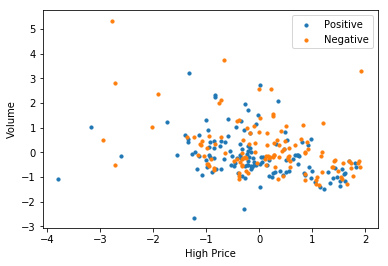

In [17]:
plt.scatter(pos.iloc[:, 0], pos.iloc[:, 1], s=10, label='Positive')
plt.scatter(neg.iloc[:, 0], neg.iloc[:, 1], s=10, label='Negative')

#x_values = [np.min(two_attr_y['Close Price'] - 5), np.max(two_attr_y['Volume'] + 5)]
#y_values = model_bl.predict(x2_test_std)
#plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('High Price')
plt.ylabel('Volume')
plt.legend()
plt.show()

### Model 2

Use `sklearn.linear_model.LogisticRegression`

In [18]:
clf = LogisticRegression(solver='liblinear').fit(x_train_std, y_train)
evaluate(clf, x_train_std, y_train, x_test_std, y_test)

Train accuracy: 0.5459363957597173
Test accuracy: 0.5198412698412699
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1]


Try to drop some attributes again...

In [19]:
clf = LogisticRegression(solver='liblinear').fit(x2_train_std, y_train)
evaluate(clf, x2_train_std, y_train, x2_test_std, y_test)

Train accuracy: 0.5459363957597173
Test accuracy: 0.5198412698412699
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## SVM

In [20]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [21]:
penalty = 0.04

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(x_train_std, y_train)
  
acc_rate = accuracy_score(y_test, svm.predict(x_test_std)) * 100
print("Penalty = %.2f, Accuracy = %.2f %%" % (penalty, acc_rate))

Penalty = 0.04, Accuracy = 51.98 %


In [22]:
for i, sv in enumerate(zip(svm.support_, svm.support_vectors_)):
    if i < 5:
        print("Index: %s; Support vector: %s" % (sv[0], sv[1]))

Index: 0; Support vector: [-1.55195714 -1.4940819  -1.50512366 -1.54059292  0.81344611]
Index: 2; Support vector: [-1.49388904 -1.4881053  -1.48631212 -1.48307362  1.8080268 ]
Index: 4; Support vector: [-1.54631106 -1.53956585 -1.55613347 -1.54582382  1.51130603]
Index: 5; Support vector: [-1.53769769 -1.57950599 -1.55215252 -1.5633288   1.30781779]
Index: 7; Support vector: [-1.62036954 -1.6177562  -1.6241603  -1.61747068  1.53048223]


In [23]:
print("The labels by model prediction :\n %s" % svm.predict(x_test_std))
print("Real labels in the testing set :\n %s" % y_test.values)

The labels by model prediction :
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Real labels in the testing set :
 [1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1
 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0
 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1
 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1
 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 

In [24]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = 'o'
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c = ['blue', 'lightgreen', 'red'][idx],
                    edgecolor='black',
                    marker=markers, 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
        
def plot_train_test(location, x, y):
  
    plt.subplot(1,2,location)
    plot_decision_regions(x, y, classifier=svm)
    
    if location == 1:
        plt.title("Training")
    elif location == 2:
        plt.title("Testing")
        
    plt.xlabel('Close Price')
    plt.ylabel('Volume')
    plt.legend(loc='upper left')
    plt.tight_layout()
    

In [25]:
xtraintmp = x_train_std.drop(['Open Price', 'High Price', 'Low Price'], axis=1)
xtesttmp = x_test_std.drop(['Open Price', 'High Price', 'Low Price'], axis=1)

xtraintmp.head()

,Close Price,Volume
0,-1.494082,0.813446
1,-1.503047,1.823778
2,-1.488105,1.808027
3,-1.545913,1.299265
4,-1.539566,1.511306


In [26]:
x_train_num = xtraintmp.to_numpy()
y_train_num = y_train.to_numpy()
x_test_num = xtesttmp.to_numpy()
y_test_num = y_test.to_numpy()
x_train_num

array([[-1.4940819 ,  0.81344611],
       [-1.50304679,  1.82377762],
       [-1.4881053 ,  1.8080268 ],
       ...,
       [ 2.11417398, -1.33141973],
       [ 2.12431358, -1.34844934],
       [ 2.09560532, -1.19583562]])

In [27]:
svm.fit(xtraintmp, y_train)

SVC(C=0.04, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

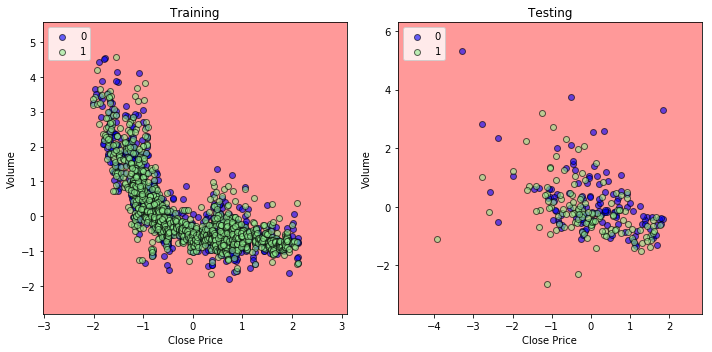

In [28]:
plt.figure(figsize=(10,5))

plot_train_test(1, x_train_num, y_train_num)
plot_train_test(2, x_test_num, y_test_num)

plt.show()

## Neural Networks

In [29]:
from keras import models, layers, optimizers, regularizers
import random
from sklearn import preprocessing
import tensorflow as tf
from tqdm import tqdm

Using TensorFlow backend.


In [30]:
y_train.value_counts()

1    1236
0    1028
Name: Tomorrow Increase, dtype: int64

In [31]:
y_test.value_counts()

1    131
0    121
Name: Tomorrow Increase, dtype: int64

In [32]:
input_dimension = 5
hidden_units = 10    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [33]:
# create a sequential model
model = models.Sequential()
# add the hidden layer
model.add(layers.Dense(input_dim=input_dimension,
                       units=hidden_units, 
                       activation=activation))
# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation=activation))
# define our loss function and optimizer
# Adam is a kind of gradient descent
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [34]:
# train the parameters
history = model.fit(x_train_std, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train_std, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test_std, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2264/2264 [==============================] - 1s 235us/step - loss: 4.1392 - acc: 0.2902
Epoch 2/10
2264/2264 [==============================] - 0s 64us/step - loss: 4.1540 - acc: 0.2633
Epoch 3/10
2264/2264 [==============================] - 0s 68us/step - loss: 4.1498 - acc: 0.2796
Epoch 4/10
2264/2264 [==============================] - 0s 55us/step - loss: 4.1523 - acc: 0.2712
Epoch 5/10
2264/2264 [==============================] - 0s 65us/step - loss: 4.1469 - acc: 0.2681
Epoch 6/10
2264/2264 [==============================] - 0s 49us/step - loss: 3.9623 - acc: 0.2800
Epoch 7/10
2264/2264 [==============================] - 0s 45us/step - loss: 2.8939 - acc: 0.3732
Epoch 8/10
2264/2264 [==============================] - 0s 48us/step - loss: 2.4775 - acc: 0.4678
Epoch 9/10
2264/2264 [==============================] - 0s 52us/step - loss: 2.9458 - acc: 0.5287
Epoch 10/10
252/252 [==============================] - 0s 26us/step
T

In [35]:
# model.predict(x_test_std)

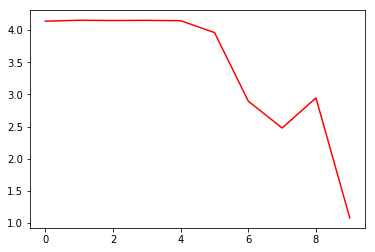

In [36]:
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [37]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(x_train, y_train, epochs=epochs, 
                      batch_size=batch_size, verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [38]:
train_accs, test_accs = train_and_evaluate(model, x_train_std, y_train, x_test_std, y_test)

100%|██████████| 20/20 [00:32<00:00,  1.52s/it]

Avgerage Training Accuracy: 0.5275618375822007
Avgerage Testing Accuracy: 0.5148809525701734


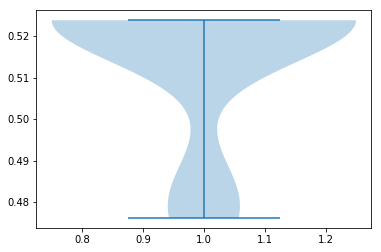

In [39]:
plt.violinplot(test_accs)
plt.show()

In [40]:
print('Max: %s' % np.max(test_accs))
print('Min: %s' % np.min(test_accs))

Max: 0.5238095242825765
Min: 0.4761904742982652


## Discussion

### How did you preprocess this dataset ?

首先加一排新的 column 內容為 Close Price 全部往上 shift 一個 row ，如此就能與隔一天的 Close Price 進行比較以得知隔一天的漲跌情形。這也會是一排新的 column，而且這就是待會想透過 training 想要得到的 y。

然後，丟掉無法直接使用的日期和剛剛 shift 得到的 column，對全部資料做標準化。

### Which classifier reaches the highest classification accuracy in this dataset ?

SVM 跟 neural networks 的準確率差不多， logistic regression 的準確率較低，不過其實全部的準確率都很低。

#### Why ?

整體準確率偏低的原因可能來自於 dataset 中包含的 attributes 與股票的漲幅較無太大關係，以致於不管是採用哪一種方法 training 出來的 model 都無法準確的預測。也很有可能是我沒有使用合適的 training 方式。

#### Can this result remain if the dataset is different ?

如果能增加一些與股票漲幅高度相關的 attributes ，例如投資人的信心程度、該公司正面新聞的比例...相信會有不同結果。

### How did you improve your classifiers ?

1. 試著刪除不同的 attributes，觀察何者是無用的資訊。
2. 嘗試使用不同的 hyperparameters 。